# Copyrights
1. textbook official repository: https://github.com/WegraLee/deep-learning-from-scratch
1. fork source: https://github.com/ExcelsiorCJH/DLFromScratch [(chapter2)](https://nbviewer.jupyter.org/github/ExcelsiorCJH/DLFromScratch/blob/master/Chap02-Perceptron/Chap02-Perceptron.ipynb)
1. additional repository: https://github.com/SDRLurker/deep-learning [(chapter2)](https://nbviewer.jupyter.org/github/SDRLurker/deep-learning/blob/master/2%EC%9E%A5.ipynb)

### Customized by Gil-Jin Jang

## 출처

이미지 출처 1 : http://makething.tistory.com/entry/9%EC%9B%94-%EB%85%BC%EB%A6%AC%EA%B2%8C%EC%9D%B4%ED%8A%B8

이미지 출처 2 : http://www.minecraftforum.net/forums/minecraft-discussion/redstone-discussion-and/341894-xor-gate-with-2-and-1-not-1-or

이미지 출처 3 : https://www.researchgate.net/figure/255786872_fig8_Figure-9-Boundary-decision-for-a-nonlinear-classifier-solving-the-bipolar-XOR-problem

이미지 출처 4 : https://github.com/paulseo0827/deeplearning/tree/master/CH2.Perceptron

# Chap02 - 퍼셉트론 Perceptron

이번 장에서는 퍼셉트론(_perceptron_) 알고리즘을 설명합니다. 퍼셉트론은 프랑크 로젠블라트(_Frank Rosenblatt_)가 1957년에 고안한 알고리즘입니다. 고대 화석 같은 이 알고리즘을 지금 시점에 왜 배우는가 하면, 퍼셉트론이 신경망(딥러닝)의 기원이 되는 알고리즘이기 때문입니다. 그래서 퍼셉트론의 구조를 배우는 것은 신경망과 딥러닝으로 나아가는 데 중요한 아이디어를 배우는 일도 됩니다.

이번 장에서는 퍼셉트론을 설명하고 퍼셉트론을 써서 간단한 문제를 풀어갑니다. 여정의 첫 목적지인 만큼 가볍고 즐거운 여행이 될 겁니다.

> **목차**
```
2.1 퍼셉트론이란? 
2.2 단순한 논리 회로 
__2.2.1 AND 게이트 
__2.2.2 NAND 게이트와 OR 게이트 
2.3 퍼셉트론 구현하기 
__2.3.1 간단한 구현부터 
__2.3.2 가중치와 편향 도입 
__2.3.3 가중치와 편향 구현하기 
2.4 퍼셉트론의 한계 
__2.4.1 도전! XOR 게이트 
__2.4.2 선형과 비선형 
2.5 다층 퍼셉트론이 출동한다면 
__2.5.1 기존 게이트 조합하기 
__2.5.2 XOR 게이트 구현하기 
2.6 NAND에서 컴퓨터까지
```

## 2.1 퍼셉트론이란?

퍼셉트론(perceptron)은 프랑크 로젠블라트(Fank Rosenblatt)가 1957년에 고안안 알고리즘이다. 이 퍼셉트론이 바로 신경망(딥러닝)의 기원이 되는 알고리즘이다.

퍼셉트론은 다수의 **신호**(흐름이 있는)를 입력으로 받아 하나의 신호를 출력한다. 퍼셉트론은 이 신호를 입력으로 받아 '흐른다/안 흐른다'(1 또는 0)이라는 정보를 앞으로 전달한다.

![](./images/perceptron.PNG)

위의 그림에서,

- $x_1$과 $x_2$는 입력 신호, $y$는 출력 신호, $w_1$과 $w_2$는 가중치(weight)를 의미한다. 
- 원을 **뉴런** 또는 **노드**라고 부른다.
- 입력 신호가 뉴런에 보내질 때는 각각 고유한 **가중치**가 곱해진다($w_1 x_1, w_2 x_2$).
- 뉴런에서 전달 받은 신호의 총합이 **임계값** $\theta$를 넘을 때만 $1$을 출력한다.

이것을 수식으로 나타내면, 아래와 같다.

$$
y=\begin{cases} 0\quad (w_1x_1 +w_2x_2 \le \theta) \\ 1 \quad (w_1x_1 + w_2x_2 > \theta) \end{cases}
$$

퍼셉트론은 복수의 입력 신호 각각에 고유한 가중치를 부여한다. 가중치는 각 신호가 결과에 주는 영향력을 조절하는 요소로 작용하며, 가중치가 클수록 해당 신호가 그만큼 더 중요함을 뜻한다.

## 2.2 단순한 논리 회로

### 2.2.1 AND 게이트

진리표: 입력 신호와 출력 신호의 대응표

AND 게이트 진리표

| x1 | x2 | y |
|----|----|----|
|  0 |  0 |  0 |
|  1 |  0 |  0 |
|  0 |  1 |  0 |
|  1 |  1 |  1 |

<!-- ![](./images/and_gate.PNG) -->

위의 표는 `AND게이트`의 진리표이며 이 AND게이트를 퍼셉트론으로 표현해보자. 이를 위해서는 $w_1, w_2, \theta$ 의 값을 적절하게 정해야 한다.

예를 들어, 

$$
(w_1, w_2, \theta) = (0.5, 0.5, 0.7)
$$

일 때, AND 게이트의 조건을 만족한다.
즉 x1, x2가 모두 1일 때만 가중신호의 총합이 주어진 임계값을 넘게 됨.

### 2.2.2 NAND 게이트와 OR 게이트

NAND 게이트는 Not AND를 의미하며 AND 게이트의 출력을 반대로한 것과 같다.

$$
(w_1, w_2, \theta) = (-0.5, -0.5, -0.7)
$$

<!-- ![](./images/nand_gate.PNG) -->
NAND 게이트 진리표

| x1 | x2 | y |
|----|----|----|
|  0 |  0 |  1 |
|  1 |  0 |  1 |
|  0 |  1 |  1 |
|  1 |  1 |  0 |

OR 게이트는 입력 신호 중 하나 이상이 1이면 출력이 1이 되는 논리 회로다.

$$
(w_1, w_2, \theta) = (0.5, 0.5, 0.2)
$$

<!-- ![](./images/or_gate.PNG) -->

OR 게이트 진리표

| x1 | x2 | y |
|----|----|----|
|  0 |  0 |  0 |
|  1 |  0 |  1 |
|  0 |  1 |  1 |
|  1 |  1 |  1 |

> 신경망 학습은 이 매개변수의 값을 정하는 작업을 컴퓨터가 자동으로 하도록 한다. **학습**이란 ***적절한 매개변수 값을 정하는 작업*** 이며, 사람은 퍼셉트론의 구조(모델)를 고민하고 컴퓨터에 학습할 데이터를 주는 일을 한다.

위의 각 게이트(AND, NAND, OR)의 진리표들을 보면, 퍼셉트론 구조는 모두 동일하며 다른것은 매개변수($w_1, w_2, \theta$)의 값뿐이다. 따라서, 매개변수의 값만 적절히 조정하면 AND, NAND, OR을 구현할 수 있다!

## 2.3 퍼셉트론 구현하기

### 2.3.1 간단한 구현부터

#### 기본적인 AND gate

In [1]:
import numpy as np

In [2]:
def AND_basic(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1*w1 + x2*w2
    if tmp <= theta: return 0
    elif tmp > theta: return 1

In [3]:
inputs = [(0, 0), (1, 0), (0, 1), (1, 1)]

for x1, x2 in inputs:
    y = AND_basic(x1, x2)
    print('({x1}, {x2}) -> {y}'.format(x1=x1, x2=x2, y=y))
    print('(%d, %d) -> %d' % (x1,x2,y))

(0, 0) -> 0
(0, 0) -> 0
(1, 0) -> 0
(1, 0) -> 0
(0, 1) -> 0
(0, 1) -> 0
(1, 1) -> 1
(1, 1) -> 1


### 2.3.2 가중치와 편향 도입

위 2.1의 식에서 $\theta$를 $-b$로 치환하면 다음과 같다.

$$
y=\begin{cases} 0\quad (b + w_1x_1 +w_2x_2 \le 0) \\ 1 \quad (b + w_1x_1 + w_2x_2 > 0) \end{cases}
$$

위의 식에서 $b$를 **편향(bias)** 이라 한다.

> 편향이라는 용어는 ‘한쪽으로 치우쳐 균형을 깬다’라는 의미를 담고 있다. 실제로 위의 식에서 두 입력($x_1, x_2$)이 모두 0이어도 결과로 (0이 아닌) 편향 값을 출력한다.

In [4]:
# AND gate with bias instead of threshold (\theta)
import numpy as np
x = np.array([0, 1])     # 입력
w = np.array([0.5, 0.5]) # 가중치
b = -0.7                 # 편향
w*x

array([0. , 0.5])

In [5]:
np.sum(w*x)

0.5

In [6]:
np.sum(w*x) + b  # <0 -> class 0

-0.19999999999999996

### 2.3.3 가중치와 편향 구현하기

#### 가중치와 편향을 도입한 AND gate

In [7]:
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0: return 0 
    else: return 1

def AND_canonical(x1, x2):
    x = np.array([x1, x2, 1])
    w = np.array([0.5, 0.5, -0.7])
    # b = -0.7  not necessary -> w0
    tmp = np.sum(w*x)
    if tmp <= 0: return 0
    else: return 1

In [8]:
inputs = [(0, 0), (1, 0), (0, 1), (1, 1)]

for x1, x2 in inputs:
    y = AND(x1, x2)
    print('({x1}, {x2}) -> {y}'.format(x1=x1, x2=x2, y=y))
print('using canonical representation')
for x1, x2 in inputs:
    y = AND_canonical(x1, x2)
    print('({x1}, {x2}) -> {y}'.format(x1=x1, x2=x2, y=y))

(0, 0) -> 0
(1, 0) -> 0
(0, 1) -> 0
(1, 1) -> 1
using canonical representation
(0, 0) -> 0
(1, 0) -> 0
(0, 1) -> 0
(1, 1) -> 1


- 가중치($w_1$, $w_2$)는 각 입력 신호가 결과에 주는 영향력(중요도)을 조절하는 매개변수
- 편향($b$)은 뉴런이 얼마나 쉽게 활성화(결과로 1을 출력)하느냐를 조정하는 매개변수
- 예시) $b = -0.1$ 이면 가중치를 곱한 합이 0.1을 초과할 때 뉴런이 활성화.
- 편향의 의미: 한 쪽으로 치우쳐 균형을 깬다.

#### NAND 게이트와 OR 게이트

In [9]:
# NAND
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0: return 0
    else: return 1

# OR
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0: return 0
    else: return 1

In [10]:
inputs = [(0, 0), (1, 0), (0, 1), (1, 1)]

print('NAND :')
for x1, x2 in inputs:
    y = NAND(x1, x2)
    print('({x1}, {x2}) -> {y}'.format(x1=x1, x2=x2, y=y))
    
print('OR :')
for x1, x2 in inputs:
    y = OR(x1, x2)
    print('({x1}, {x2}) -> {y}'.format(x1=x1, x2=x2, y=y))

NAND :
(0, 0) -> 1
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 0
OR :
(0, 0) -> 0
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 1


In [11]:
# NAND canonical representation
def NANDc(x1, x2):
    #x = np.array([x1, x2, 1])
    x = [x1, x2, 1]
    w = np.array([-0.5, -0.5, 0.7])
    if np.sum(w*x) <= 0: return 0
    else: return 1

# OR canonical representation
def ORc(x1, x2):
    x = np.array([x1, x2, 1])
    w = np.array([0.5, 0.5, -0.2])
    if np.sum(w*x) <= 0: return 0
    else: return 1

In [12]:
inputs = [(0, 0), (1, 0), (0, 1), (1, 1)]

print('NAND :')
for x1, x2 in inputs:
    y = NANDc(x1, x2)
    print('({x1}, {x2}) -> {y}'.format(x1=x1, x2=x2, y=y))
    
print('OR :')
for x1, x2 in inputs:
    y = ORc(x1, x2)
    print('({x1}, {x2}) -> {y}'.format(x1=x1, x2=x2, y=y))

NAND :
(0, 0) -> 1
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 0
OR :
(0, 0) -> 0
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 1


## 2.4 퍼셉트론의 한계

### 2.4.1 도전! XOR 게이트

XOR 게이트는 **베타적 논리합** 이라는 논리 회로다.

![](./images/xor_gate.PNG)

단층 퍼셉트론으로 AND, NAND, OR 게이트는 구현 가능하지만, XOR 게이트는 구현할 수 없다. 퍼셉트론은 아래와 같이 **직선** 으로 나뉜 두 영역을 만든다. 하지만 XOR은 직선으로 두 영역을 나눌 수 없다.

![](./images/or-vs-xor.png)

($b$, $w_1$, $w_2$) = (-0.5, 1.0, 1.0)일 때 OR 게이트 퍼셉트론 식

\begin{equation*}
y = 0 (-0.5 + x_1 + x_2 <= 0)
\end{equation*}
\begin{equation*}
y = 1 (-0.5 + x_1 + x_2 > 0)
\end{equation*}

퍼셉트론의 시각화: 회색 영역은 0을 출력하는 영역. 전체 영역을 OR 게이트 성질을 만족

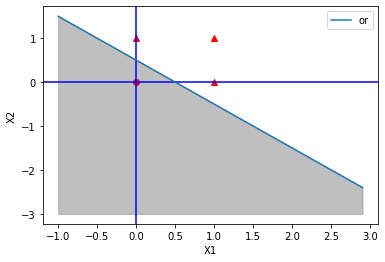

In [13]:
%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt
import matplotlib

x1 = np.arange(-1, 3, 0.1)
x2 = -x1 + 0.5

plt.axvline(x=0, color = 'b')  # draw x =0 axes
plt.axhline(y=0, color = 'b')   # draw y =0 axes

# 그래프 그리기
plt.plot(x1, x2, label="or")
plt.xlabel("X1") # x축 이름
plt.ylabel("X2") # y축 이름
plt.legend()

plt.fill_between(x1, x2, -3, color='grey', alpha=0.5)

plt.scatter([0],[0],marker='o',color='r')
plt.scatter([1,0,1],[0,1,1],marker='^',color='r')
plt.show()

OR 게이트는 ($x_1$, $x_2$)=(0,0)일 때 0을 출력(원으로 표시). (0,1),(1,0),(1,1)일 때 1을 출력(세모로 표시)

XOR 게이트를 직선 하나로 0과 1을 나누는 영역을 만들 수 있을까?

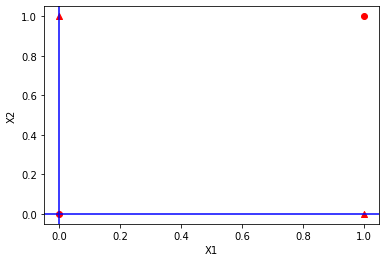

In [14]:
# 0과 1을 직선 하나로 나누는 것이 불가능. 
x1 = np.arange(-1, 3, 0.1)
x2 = -x1 + 0.5

plt.axvline(x=0, color = 'b')  # draw x =0 axes
plt.axhline(y=0, color = 'b')   # draw y =0 axes
plt.xlabel("X1") # x축 이름
plt.ylabel("X2") # y축 이름

plt.scatter([0,1],[0,1],marker='o',color='r')
plt.scatter([1,0],[0,1],marker='^',color='r')
plt.show()

### 2.4.2 선형과 비선형

만약 직선 즉, 선형이라는 제약을 없앤 **비선형** 이라면 아래와 같이 영역을 나눌 수 있다.

![](./images/xor_gate2.png)

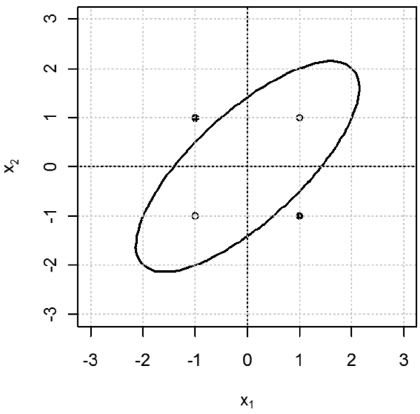

In [15]:
from IPython.display import Image, display
display(Image(filename='images/SDRLurker_decision.png', embed=True))

## 2.5 다층 퍼셉트론이 출동한다면

단층 퍼셉트론으로는 XOR을 구현할 수 없지만, **다층 퍼센트론(multi-layer perceptron)** 으로 XOR 게이트를 구현할 수 있다. 

### 2.5.1 기존 게이트 조합하기

![](./images/xor_gate3.png)

![](./images/xor_gate4.png)

### 2.5.2 XOR 게이트 구현하기

In [16]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

In [17]:
print('XOR :')
for x1, x2 in inputs:
    y = XOR(x1, x2)
    print('({x1}, {x2}) -> {y}'.format(x1=x1, x2=x2, y=y))

XOR :
(0, 0) -> 0
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 0


AND, OR는 단층 퍼셉트론

XOR은 2층 퍼셉트론

2층 퍼셉트론 서술

* 0층의 두 뉴런이 입력신호를 받아 1층의 뉴런으로 신호를 보냄
* 1층의 뉴런이 2층의 뉴런으로 신호를 보내고 2층의 뉴런은 이 입력신호를 바탕으로 y를 출력

작업자(뉴런)들 사이에서 부품을 전달

단층 퍼셉트론으로는 표현하지 못한 것을 층을 하나 늘려 구현 가능

## 2.6 정리

- 퍼셉트론은 입출력을 갖춘 알고리즘이다. 입력을 주면 정해진 규칙에 따른 값을 출력한다.
- 퍼셉트론에서는 ‘가중치’와 ‘편향’을 매개변수로 설정한다.
- 퍼셉트론으로 AND, OR 게이트 등의 논리 회로를 표현할 수 있다.
- XOR 게이트는 단층 퍼셉트론으로는 표현할 수 없다.
- 2층 퍼셉트론을 이용하면 XOR 게이트를 표현할 수 있다.
- 단층 퍼셉트론은 직선형 영역만 표현할 수 있고, 다층 퍼셉트론은 비선형 영역도 표현할 수 있다.
- 다층 퍼셉트론은 (이론상) 컴퓨터를 표현할 수 있다.